

# Superstore campaign


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import pandas_profiling as pp
import ydata_profiling as yp
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler

## Data cleaning

In [40]:
df = pd.read_csv('super_store1.csv')

In [41]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0.0,0,6/16/2014,0.0,189,...,111,189,218,1,4,4,6.0,1,1.0,0.0
1,1,1961,Graduation,Single,57091.0,0.0,0,6/15/2014,0.0,464,...,7,0,37,1,7,3,7.0,5,1.0,0.0
2,10476,1958,Graduation,Married,67267.0,0.0,1,5/13/2014,0.0,134,...,15,2,30,1,3,2,5.0,2,0.0,0.0
3,1386,1967,Graduation,Together,32474.0,1.0,1,11/5/2014,0.0,10,...,0,0,0,1,1,0,2.0,7,0.0,0.0
4,5371,1989,Graduation,Single,21474.0,1.0,0,8/4/2014,0.0,6,...,11,0,34,2,3,1,2.0,7,NaN,0.0


### 1. Below we do data validation- 

In [42]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2239.000000,2240.000000,2210.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2240.000000,2236.000000,2232.000000
mean,5592.159821,1968.805804,52247.251354,0.444395,0.506250,49.085068,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.795240,5.316518,0.148927,0.009409
std,3246.662198,11.984069,25173.076661,0.538436,0.544538,28.933996,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.256939,2.426645,0.356096,0.096562
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [43]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome                 int64
Dt_Customer             object
Recency                float64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases      float64
NumWebVisitsMonth        int64
Response               float64
Complain               float64
dtype: object

 ## 2. removing null values and replacing with median

In [44]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 1
Teenhome                0
Dt_Customer             0
Recency                30
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases      13
NumWebVisitsMonth       0
Response                4
Complain                8
dtype: int64

In [45]:
df=df.fillna(df.median())

C:\Users\prath\AppData\Local\Temp\ipykernel_68696\308181716.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.median())


In [46]:
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

### 3. now we remove the outliers, from the columns

In [47]:
df = df[df['Year_Birth'] > 1930]
df = df[df['Income']<150000]
df = df[df['MntMeatProducts']<1000]
df = df[df['MntGoldProds']<300]
df = df[df['NumDealsPurchases']<10]
df = df[df['NumWebPurchases']<15]
df = df[df['NumCatalogPurchases']<15]
df = df[df['NumWebVisitsMonth']<13]

### 4. Removing Complain column as there are 20 1s and 2176 0s

In [48]:
df['Complain'].value_counts()

0.0    2176
1.0      20
Name: Complain, dtype: int64

In [49]:
df.drop('Complain',axis=1,inplace=True)

### 5. removing alone, yolo and absurd from the marital status as they are insignificant

In [50]:
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

Graduation    1110
PhD            471
Master         363
2n Cycle       198
Basic           54
Name: Education, dtype: int64
Married     848
Together    566
Single      472
Divorced    227
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [51]:
df=df[(df['Marital_Status']!=('Absurd')) & (df['Marital_Status']!=('YOLO')) & (df['Marital_Status']!=('Alone'))]

In [52]:
print(df['Marital_Status'].value_counts())

Married     848
Together    566
Single      472
Divorced    227
Widow        76
Name: Marital_Status, dtype: int64


### 6. label encoding education because it might be useful


In [53]:
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'])

In [54]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1826,1970,2,0,84835.0,0.0,0,6/16/2014,0.0,189,...,379,111,189,218,1,4,4,6.0,1,1.0
1,1,1961,2,2,57091.0,0.0,0,6/15/2014,0.0,464,...,64,7,0,37,1,7,3,7.0,5,1.0
2,10476,1958,2,1,67267.0,0.0,1,5/13/2014,0.0,134,...,59,15,2,30,1,3,2,5.0,2,0.0
3,1386,1967,2,3,32474.0,1.0,1,11/5/2014,0.0,10,...,1,0,0,0,1,1,0,2.0,7,0.0
4,5371,1989,2,2,21474.0,1.0,0,8/4/2014,0.0,6,...,24,11,0,34,2,3,1,2.0,7,0.0


### 7. changing date to month and year, cuz month seems intuitive to have some sort of shopping patterns, like people shop more during black friday etc.,

In [55]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [56]:
df['month_Customer'] = df['Dt_Customer'].dt.month
df['year_Customer'] = df['Dt_Customer'].dt.year
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,month_Customer,year_Customer
0,1826,1970,2,0,84835.0,0.0,0,2014-06-16,0.0,189,...,189,218,1,4,4,6.0,1,1.0,6,2014
1,1,1961,2,2,57091.0,0.0,0,2014-06-15,0.0,464,...,0,37,1,7,3,7.0,5,1.0,6,2014
2,10476,1958,2,1,67267.0,0.0,1,2014-05-13,0.0,134,...,2,30,1,3,2,5.0,2,0.0,5,2014
3,1386,1967,2,3,32474.0,1.0,1,2014-11-05,0.0,10,...,0,0,1,1,0,2.0,7,0.0,11,2014
4,5371,1989,2,2,21474.0,1.0,0,2014-08-04,0.0,6,...,0,34,2,3,1,2.0,7,0.0,8,2014


### 8. create age column

In [57]:
df['age']=df['year_Customer']-df['Year_Birth']

### 9. normalizing the data so that we can cluster the data if we want to

In [58]:
scaler = MinMaxScaler()

# normalize the values in columns 'A' and 'B'
df[[ 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'month_Customer', 'year_Customer', 'age']] = scaler.fit_transform(df[[ 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'month_Customer', 'year_Customer', 'age']])

print(df)

         Id  Year_Birth  Education  Marital_Status    Income  Kidhome  \
0      1826    0.535714        0.5            0.00  0.789366      0.0   
1         1    0.375000        0.5            0.50  0.506180      0.0   
2     10476    0.321429        0.5            0.25  0.610048      0.0   
3      1386    0.482143        0.5            0.75  0.254912      0.5   
4      5371    0.875000        0.5            0.50  0.142634      0.5   
...     ...         ...        ...             ...       ...      ...   
2235  10142    0.642857        1.0            0.00  0.601974      0.0   
2236   5263    0.660714        0.0            0.25  0.240438      0.5   
2237     22    0.642857        0.5            0.00  0.396138      0.5   
2238    528    0.678571        0.5            0.25  0.595268      0.0   
2239   4070    0.517857        1.0            0.25  0.891805      0.0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntGoldProds  \
0          0.0  2014-06-16      0.0  0.126591  ...     

In [59]:
print(df.duplicated().sum())

0


In [60]:
df.dtypes

Id                              int64
Year_Birth                    float64
Education                     float64
Marital_Status                float64
Income                        float64
Kidhome                       float64
Teenhome                      float64
Dt_Customer            datetime64[ns]
Recency                       float64
MntWines                      float64
MntFruits                     float64
MntMeatProducts               float64
MntFishProducts               float64
MntSweetProducts              float64
MntGoldProds                  float64
NumDealsPurchases             float64
NumWebPurchases               float64
NumCatalogPurchases           float64
NumStorePurchases             float64
NumWebVisitsMonth             float64
Response                      float64
month_Customer                float64
year_Customer                 float64
age                           float64
dtype: object

### 10. checking for duplicates and removing them

In [61]:
df.duplicated().sum()

0

In [62]:
df.drop_duplicates(inplace=True)

# EDA

### 1. plotting the correlation matrix to know the relation between the columns

In [63]:
corr_matrix = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

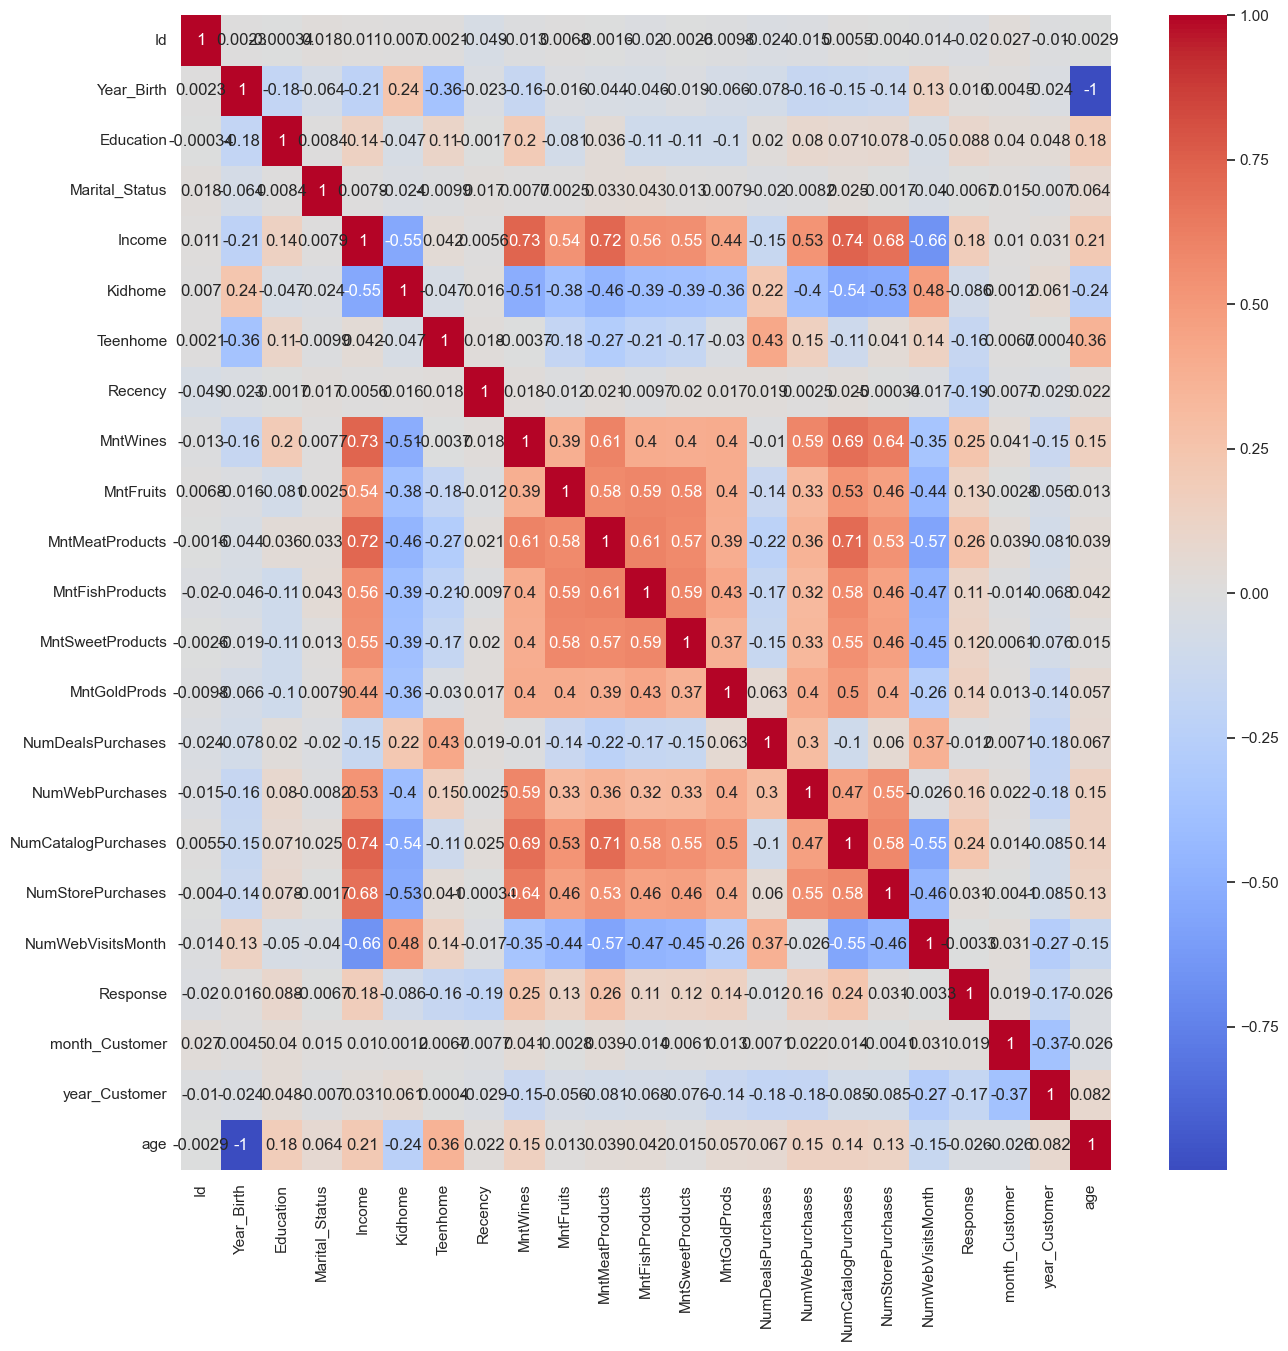

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show

In [65]:
corr_matrix

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,month_Customer,year_Customer,age
Id,1.000000,0.002261,-0.000335,0.018345,0.011024,0.007027,0.002128,-0.049112,-0.012568,0.006830,...,-0.009825,-0.024218,-0.014860,0.005502,-0.004038,-0.013985,-0.019569,0.027489,-0.010471,-0.002863
Year_Birth,0.002261,1.000000,-0.179171,-0.064137,-0.211739,0.242503,-0.364060,-0.023493,-0.159275,-0.015963,...,-0.065797,-0.078230,-0.157372,-0.148784,-0.138772,0.133700,0.016061,0.004470,-0.024392,-0.998310
Education,-0.000335,-0.179171,1.000000,0.008427,0.143520,-0.047256,0.113611,-0.001661,0.200948,-0.080642,...,-0.104635,0.019562,0.079791,0.071007,0.078106,-0.049712,0.087935,0.040220,0.047504,0.181375
Marital_Status,0.018345,-0.064137,0.008427,1.000000,0.007887,-0.023620,-0.009927,0.016942,0.007685,0.002533,...,0.007927,-0.020398,-0.008188,0.024756,-0.001743,-0.039946,-0.006734,0.014858,-0.006971,0.063532
Income,0.011024,-0.211739,0.143520,0.007887,1.000000,-0.545351,0.042232,0.005611,0.734101,0.538701,...,0.438497,-0.149464,0.525651,0.735105,0.682497,-0.656412,0.176426,0.010410,0.031287,0.212899
Kidhome,0.007027,0.242503,-0.047256,-0.023620,-0.545351,1.000000,-0.046802,0.016187,-0.511473,-0.376863,...,-0.364938,0.223226,-0.399568,-0.540660,-0.526360,0.478886,-0.085681,0.001228,0.060619,-0.238226
Teenhome,0.002128,-0.364060,0.113611,-0.009927,0.042232,-0.046802,1.000000,0.018161,-0.003744,-0.177653,...,-0.030196,0.428121,0.151391,-0.113320,0.041149,0.137206,-0.163053,0.006733,0.000397,0.362952
Recency,-0.049112,-0.023493,-0.001661,0.016942,0.005611,0.016187,0.018161,1.000000,0.017897,-0.011902,...,0.016503,0.018712,0.002541,0.025344,-0.000339,-0.017302,-0.193850,-0.007748,-0.028945,0.021738
MntWines,-0.012568,-0.159275,0.200948,0.007685,0.734101,-0.511473,-0.003744,0.017897,1.000000,0.390658,...,0.401233,-0.010338,0.586448,0.691261,0.638257,-0.345519,0.246565,0.040732,-0.146294,0.150277
MntFruits,0.006830,-0.015963,-0.080642,0.002533,0.538701,-0.376863,-0.177653,-0.011902,0.390658,1.000000,...,0.402697,-0.144422,0.326355,0.525283,0.463982,-0.441848,0.126776,-0.002813,-0.055737,0.012674


### 2. plotting the histogram to know the distribution of the columns.

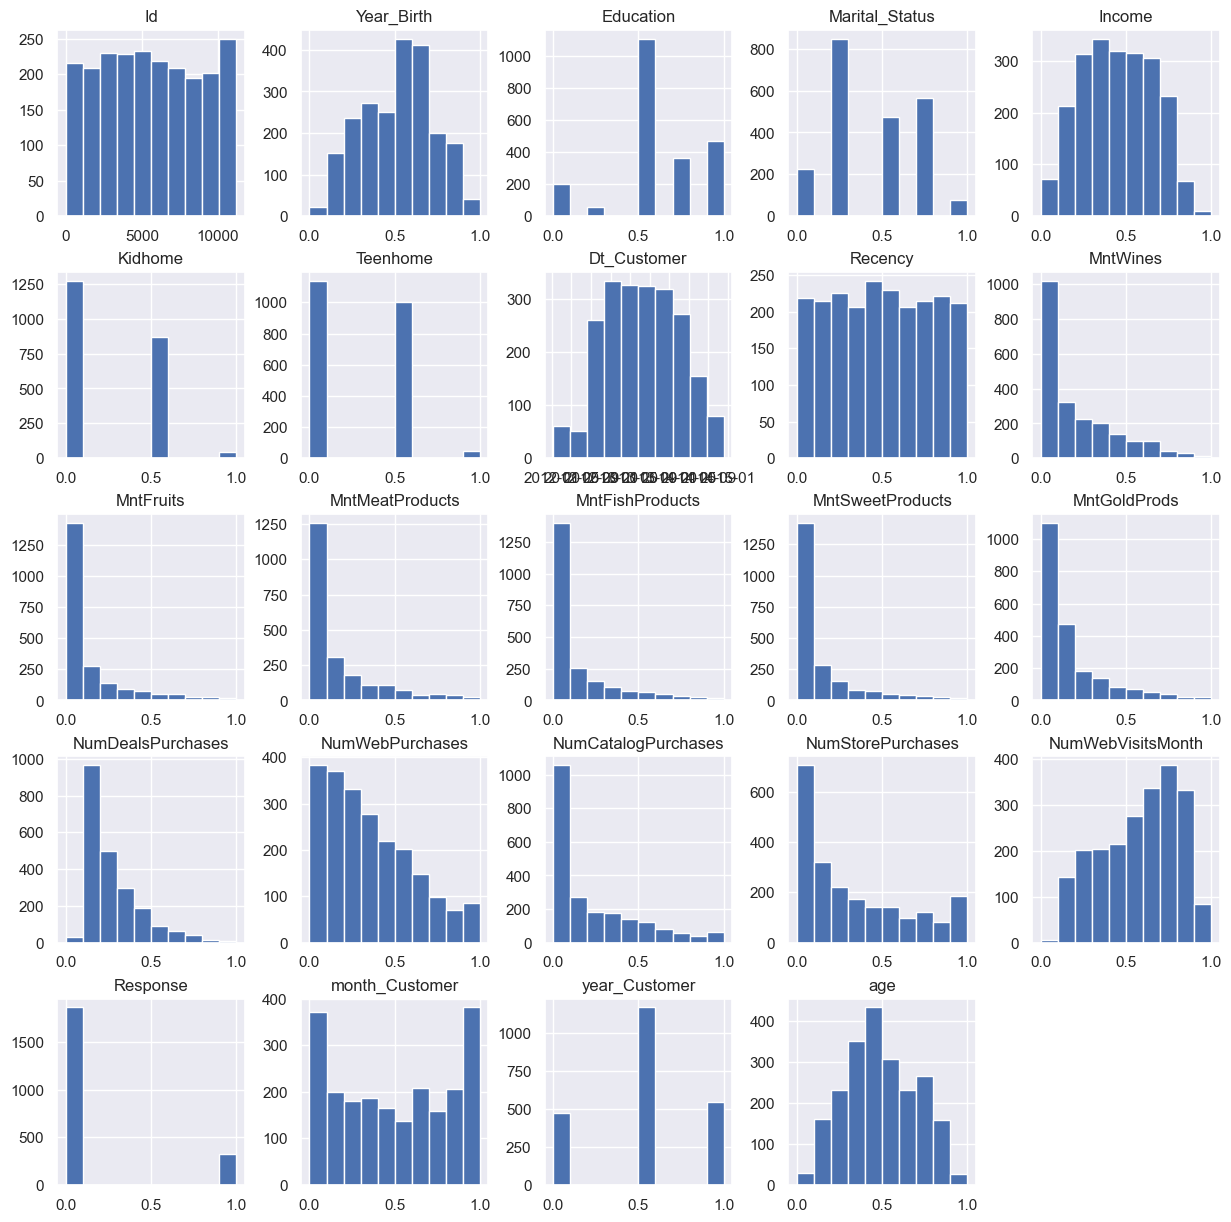

In [66]:
df.hist(figsize=(15, 15))  # using hist() method
plt.show()

In [67]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,month_Customer,year_Customer,age
0,1826,0.535714,0.5,0.00,0.789366,0.0,0.0,2014-06-16,0.0,0.126591,...,0.875502,0.111111,0.363636,0.363636,0.363636,0.1,1.0,0.454545,1.0,0.491228
1,1,0.375000,0.5,0.50,0.506180,0.0,0.0,2014-06-15,0.0,0.310784,...,0.148594,0.111111,0.636364,0.272727,0.454545,0.5,1.0,0.454545,1.0,0.649123
2,10476,0.321429,0.5,0.25,0.610048,0.0,0.5,2014-05-13,0.0,0.089752,...,0.120482,0.111111,0.272727,0.181818,0.272727,0.2,0.0,0.363636,1.0,0.701754
3,1386,0.482143,0.5,0.75,0.254912,0.5,0.5,2014-11-05,0.0,0.006698,...,0.000000,0.111111,0.090909,0.000000,0.000000,0.7,0.0,0.909091,1.0,0.543860
4,5371,0.875000,0.5,0.50,0.142634,0.5,0.0,2014-08-04,0.0,0.004019,...,0.136546,0.222222,0.272727,0.090909,0.000000,0.7,0.0,0.636364,1.0,0.157895


### 3. MntWines is the most correlated to our target, so we see how it is related to other columns

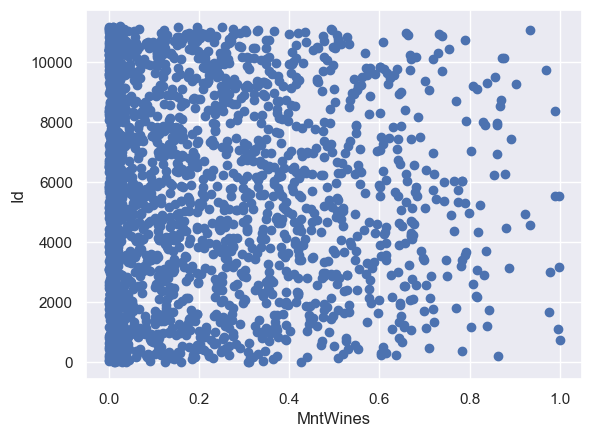

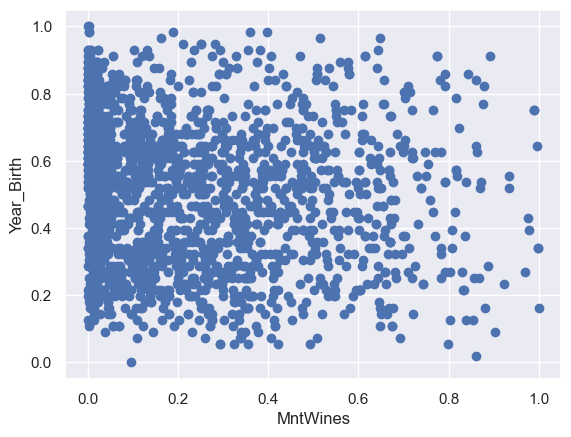

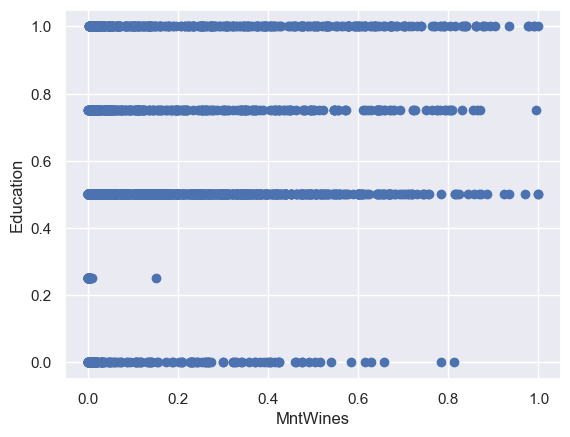

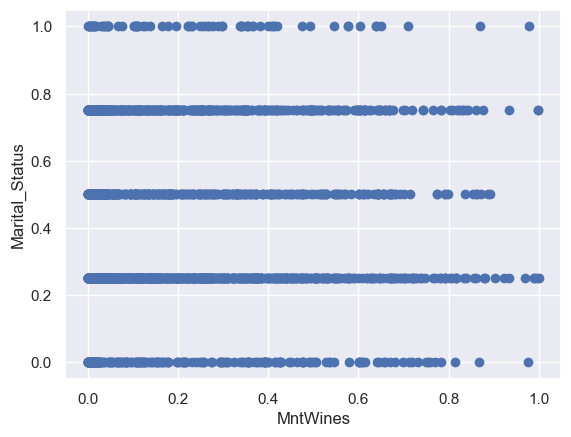

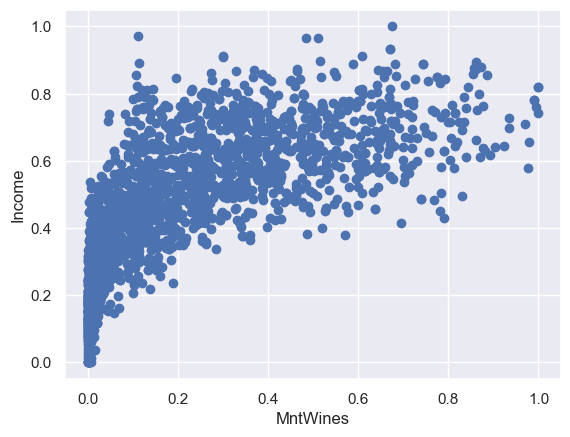

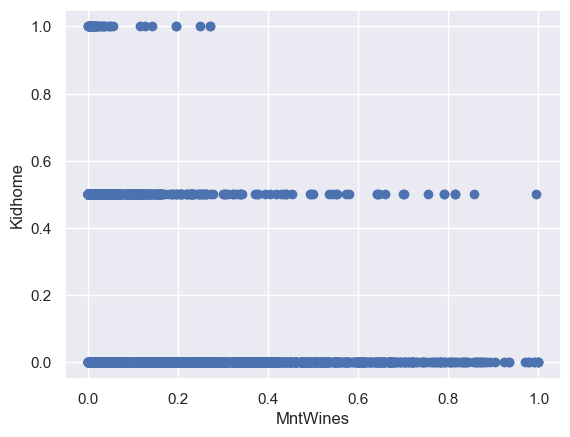

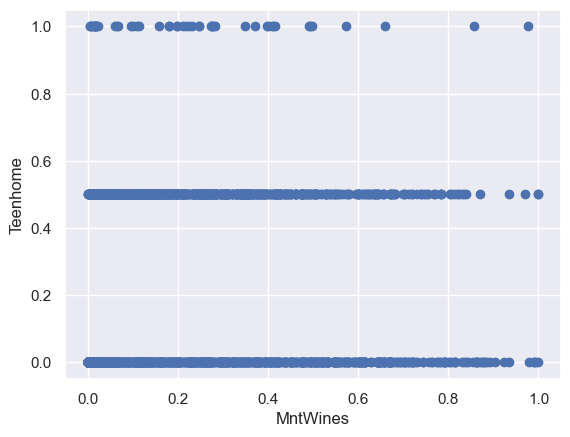

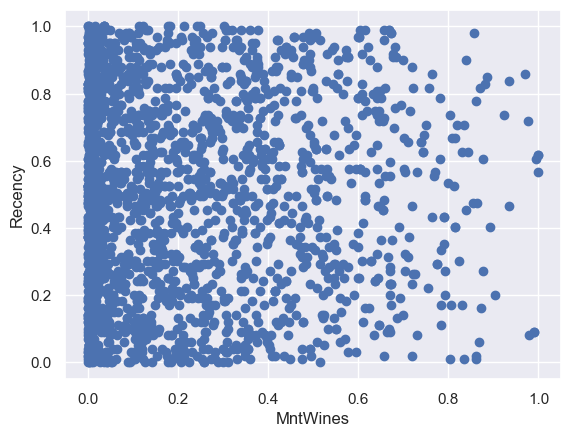

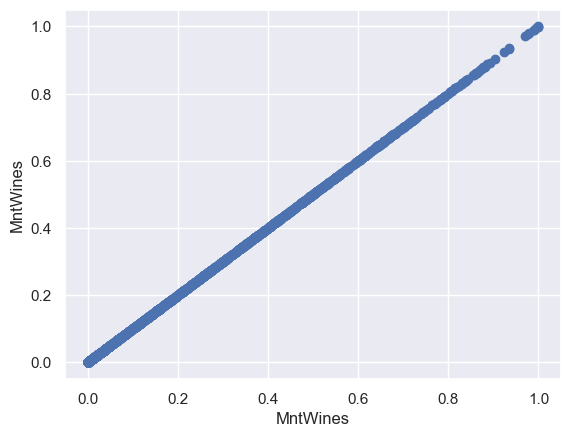

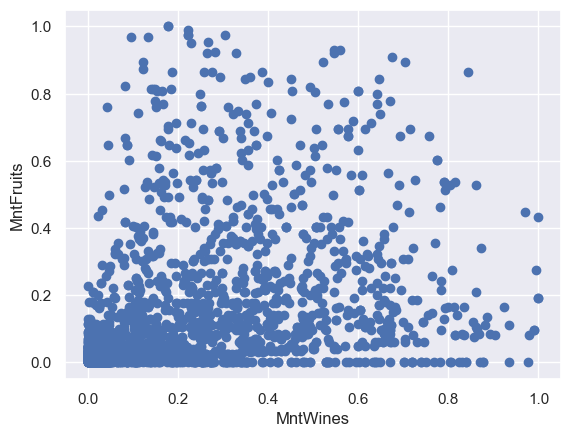

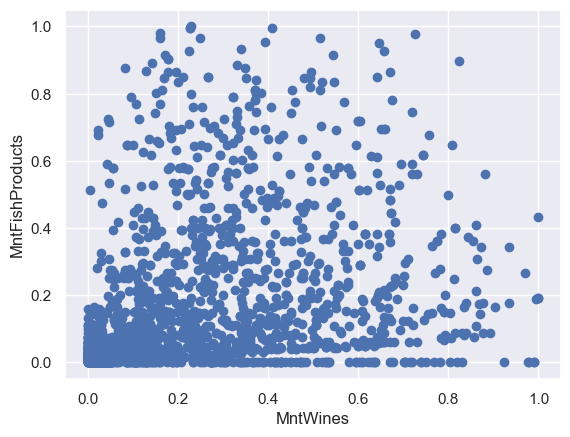

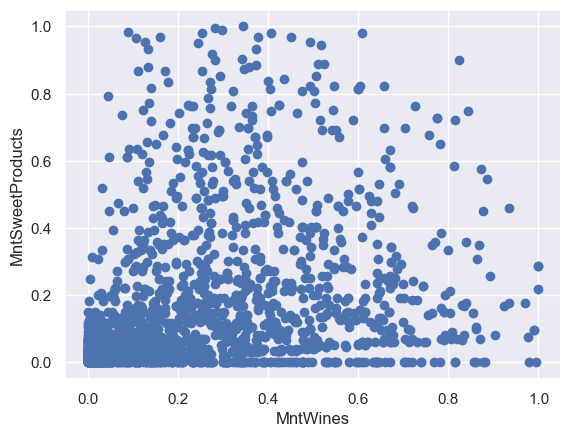

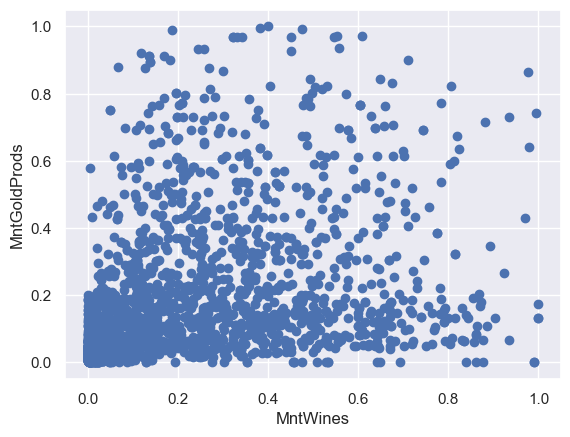

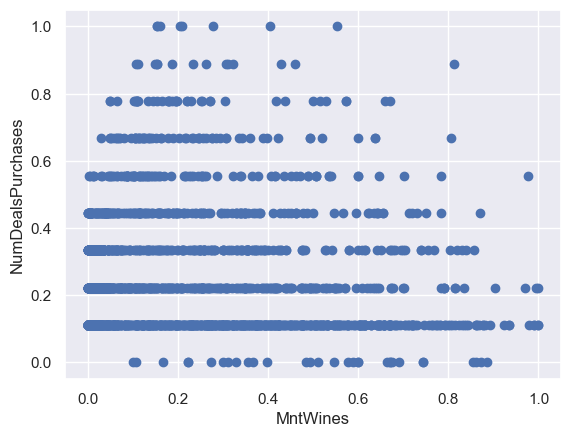

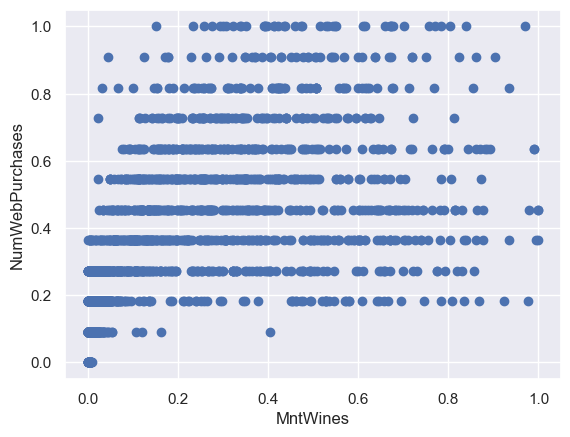

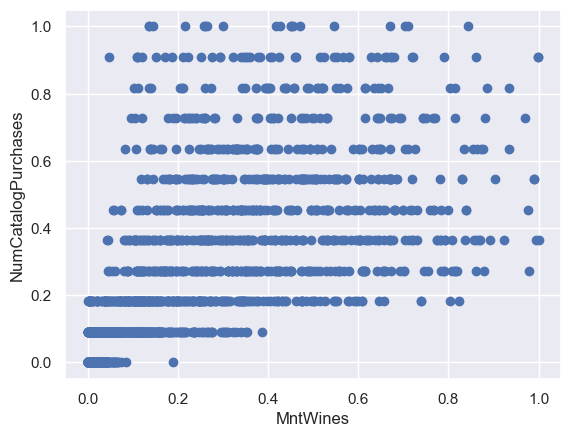

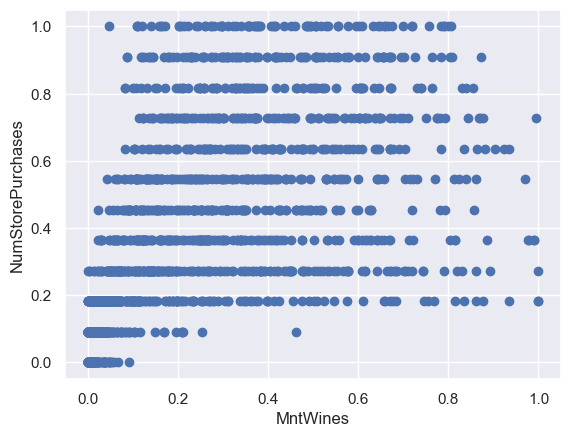

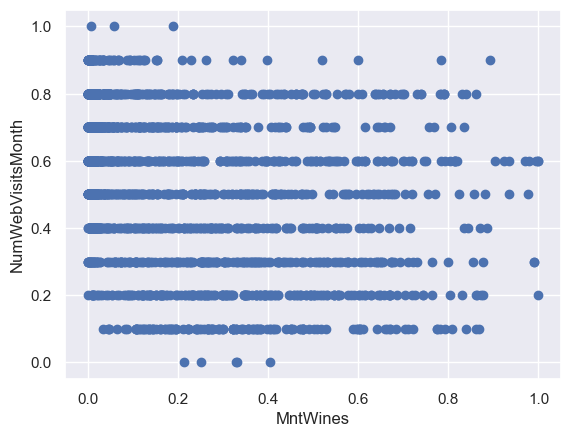

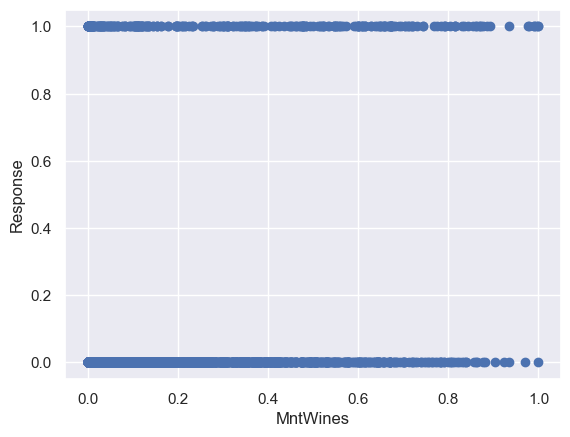

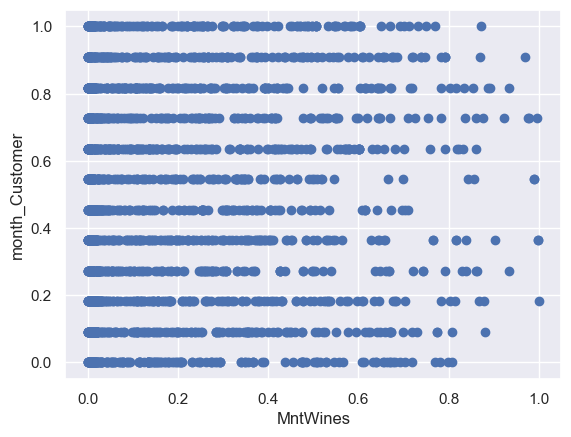

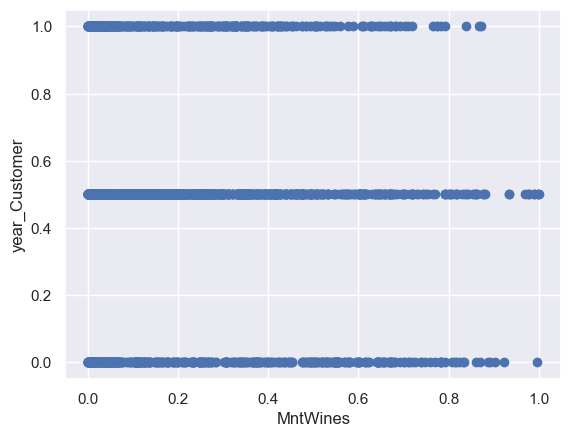

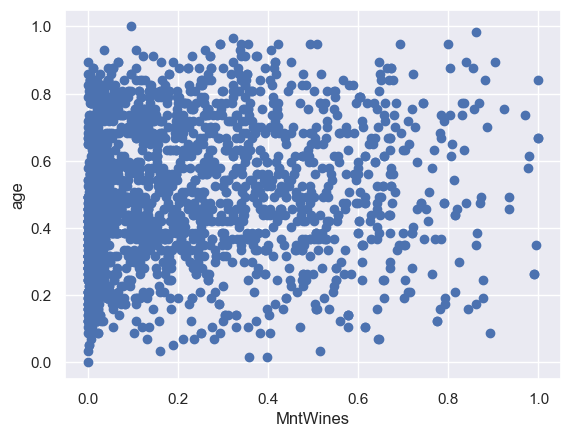

In [68]:
for col in df.columns:
    if col != 'MntMeatProducts' and col != 'Dt_Customer':
        plt.scatter(df['MntWines'], df[col])
        plt.xlabel('MntWines')
        plt.ylabel(col)
        plt.show()

### 4. We explore the Dt_Customer to know if there are any monthly trends

### we already divided the Dt_Customer column into month_customer and year_customer in data cleaning, now we can explore them

year
AxesSubplot(0.125,0.11;0.775x0.77)


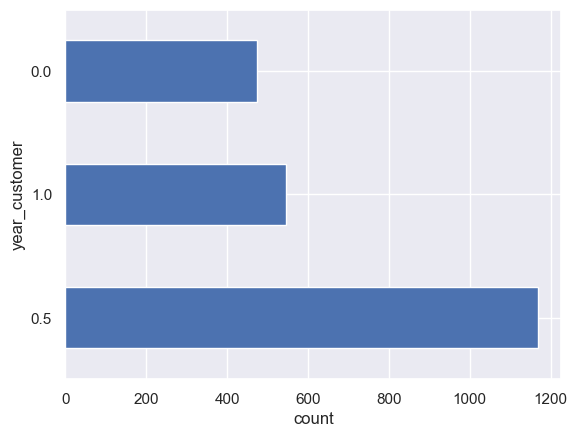

month
AxesSubplot(0.125,0.11;0.775x0.77)


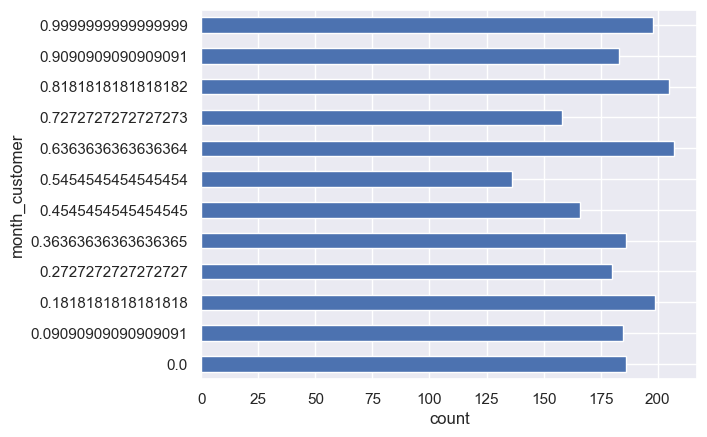

In [69]:
print('year')
print(pd.Series(df['year_Customer'].value_counts()).plot(kind='barh'))
plt.ylabel("year_customer")
plt.xlabel("count")
plt.show()
print("month")
print(pd.Series(df['month_Customer'].value_counts()).sort_index().plot(kind='barh'))
plt.ylabel("month_customer")
plt.xlabel("count")
plt.show()

### we observe that the volume of the data has no dependency on month, and the distribution seems to be random. also, there is more data during the year 2013, maybe that's when it is collected?

## 5. box plot to show the distribution of the dataset, and removing more potential outliers, also to know if the data is skewed and how

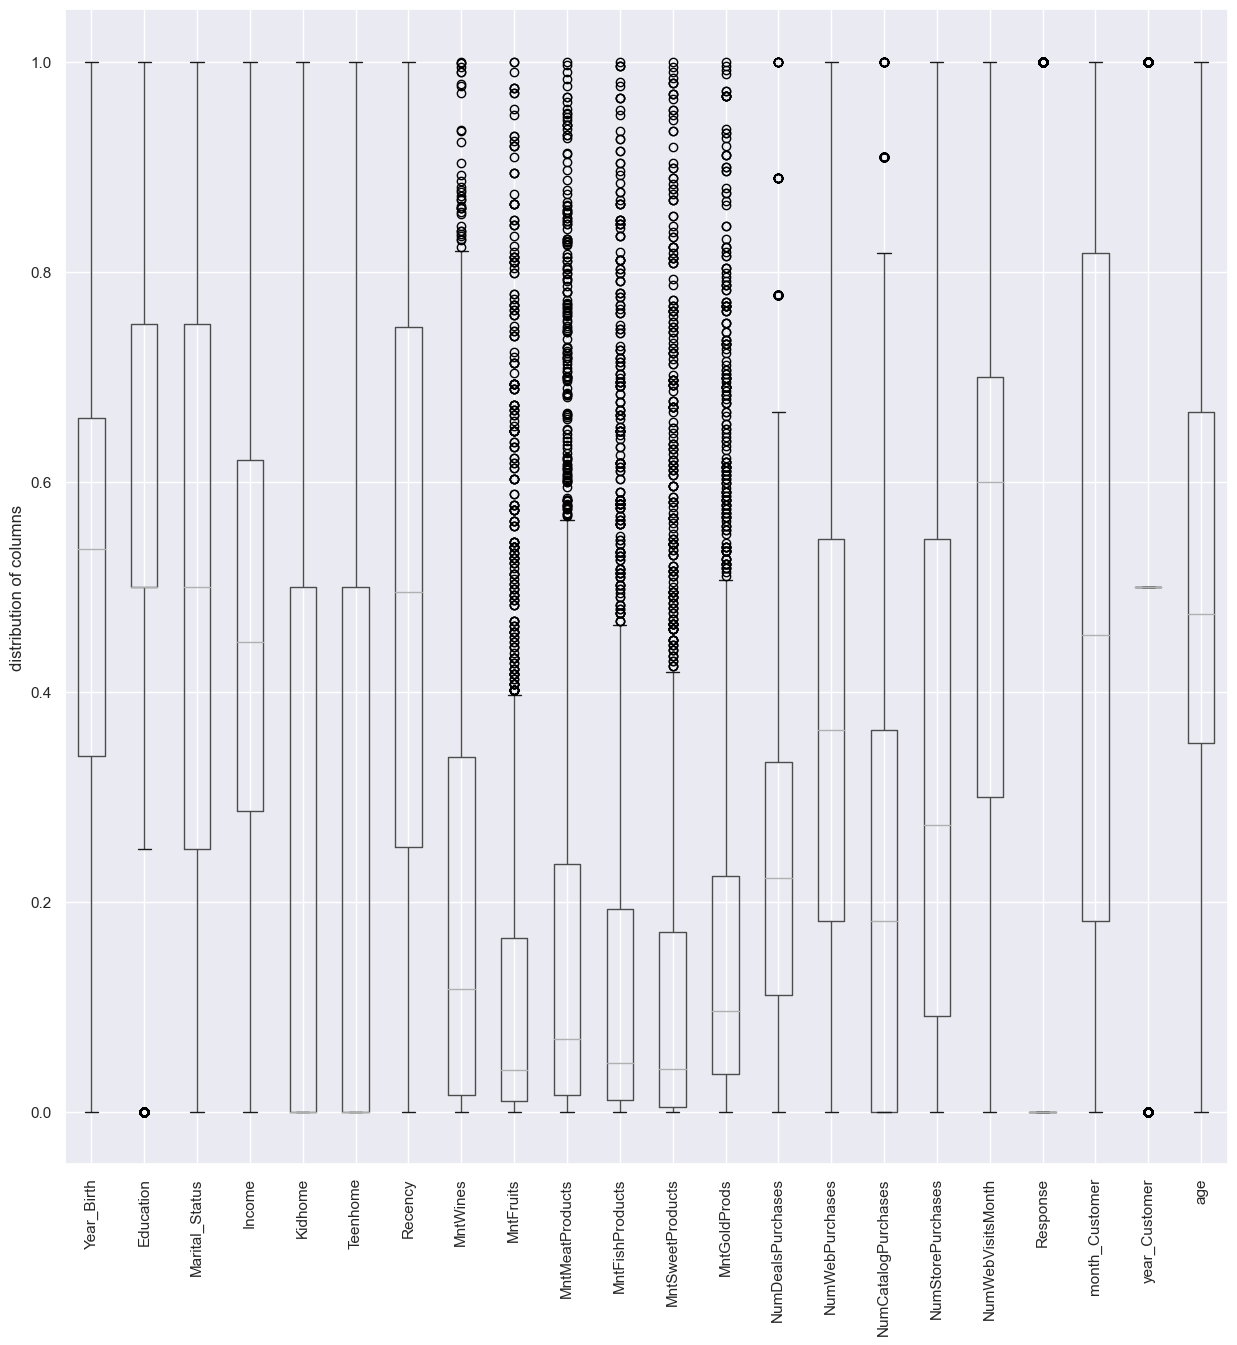

In [70]:
df.boxplot(column=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'month_Customer', 'year_Customer', 'age'],figsize=(15,15))
plt.xticks(rotation=90)
plt.ylabel("distribution of columns")
plt.show()

### we need not remove outliers in education, because it is a categorical variable, the high values in Mntfruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds are being shown as outliers because the data is skewed and those columns have alot of zeroes too. we don't remove the higher values as it might be important for our data. we need to remove the number of deals purchased which are more than 0.8

In [71]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'month_Customer', 'year_Customer', 'age'],
      dtype='object')

### 6. pivot plot with x-values as Education, Values=Income, and columns =Teenhome

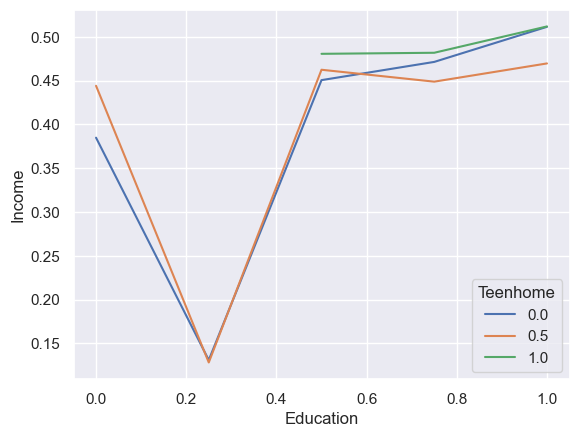

In [77]:
# create a pivot table with 'Name' as rows and 'Year' as columns
%matplotlib inline
sns.set()
pivot_table = df.pivot_table(values='Income', index='Education', columns='Teenhome', aggfunc='mean')

# plot the pivot table as a bar chart
pivot_table.plot()
plt.ylabel('Income')
plt.show()

### 7. Count plot of the target variable - response

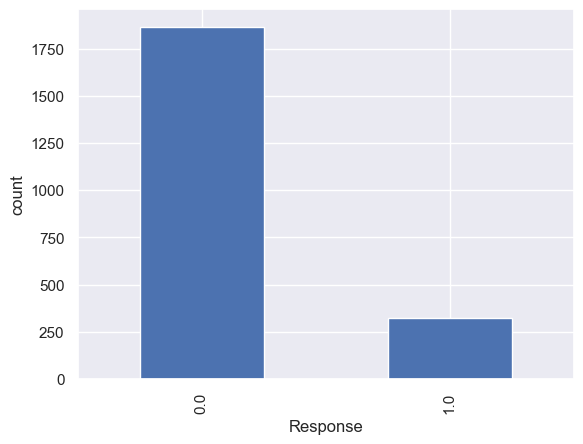

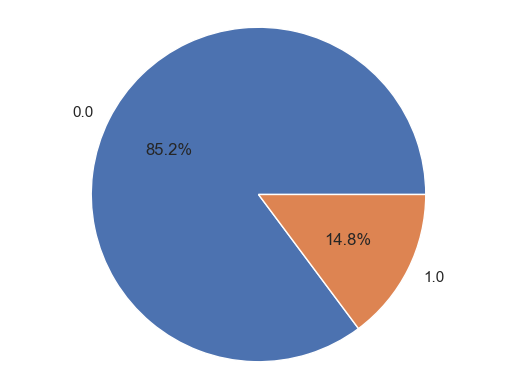

In [74]:
df['Response'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.xlabel("Response")
plt.show()
counts=df['Response'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### 8. Strip plot between two variables, response and others

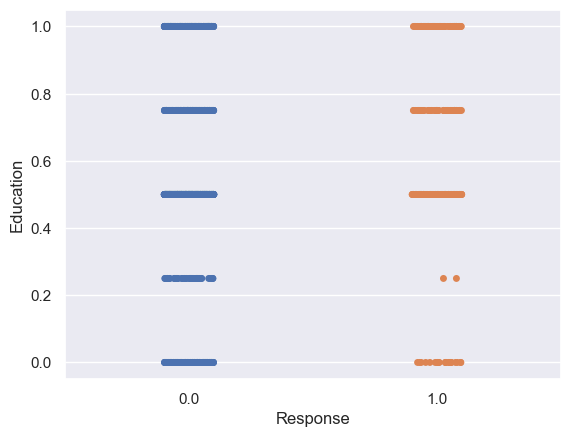

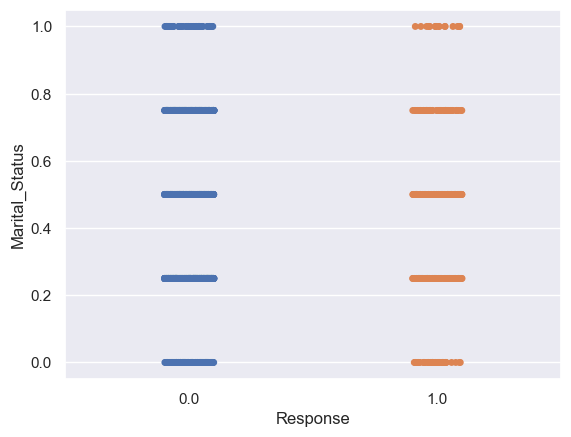

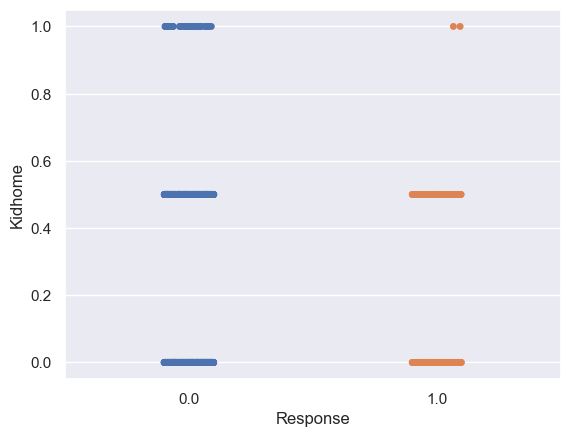

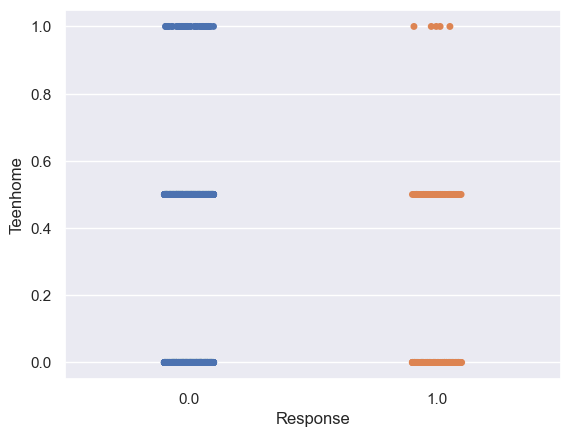

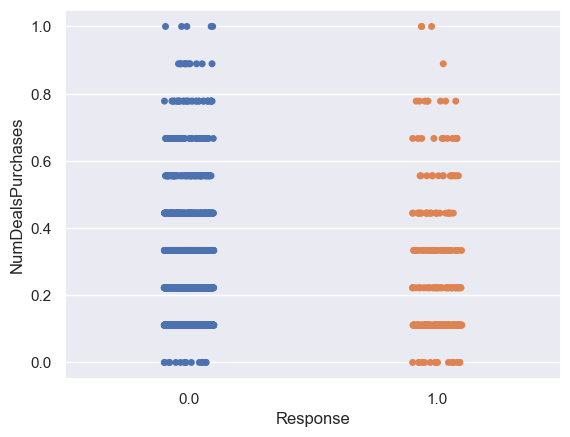

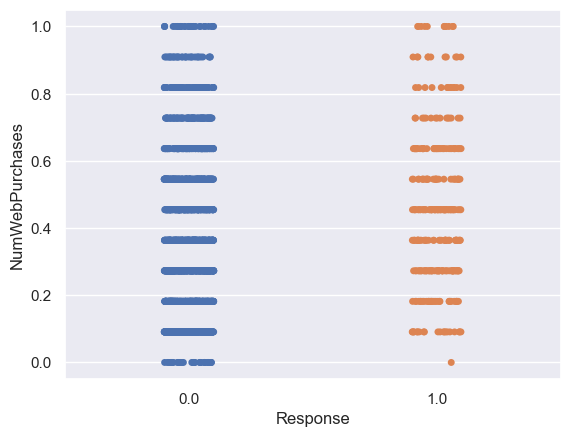

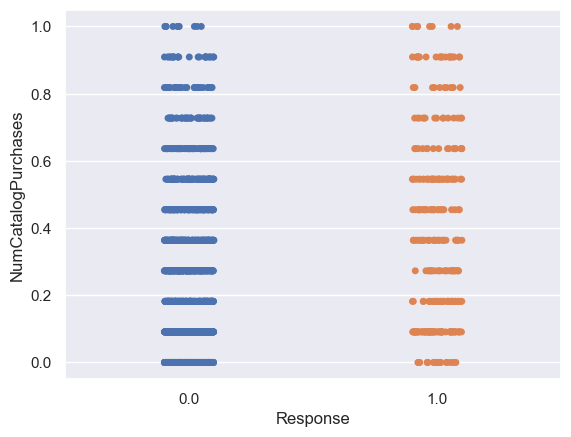

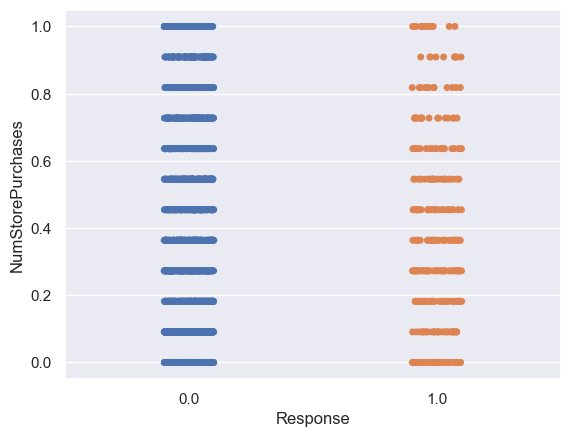

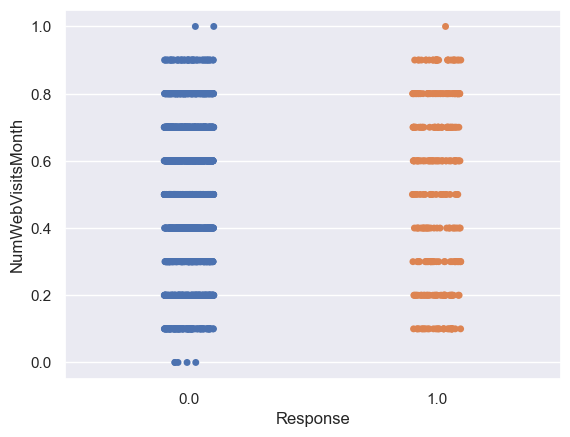

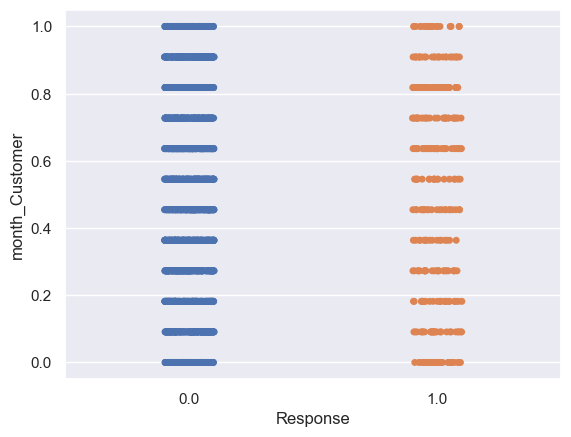

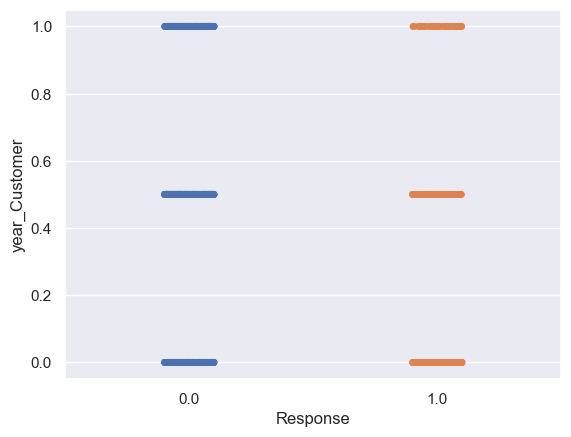

In [75]:
for i in df.columns:
    if i not in ['Response','Dt_Customer','Id','Year_Birth','Income','Recency','MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','age']:
        sns.stripplot(x='Response', y=i, data=df)
        plt.show()
#sns.stripplot(x='Response', y='Kidhome', data=df)
#plt.show()
#sns.stripplot(x='Response', y='NumStorePurchases', data=df)
#plt.show()
#sns.stripplot(x='Response', y='NumStorePurchases', data=df)
#plt.show()

### 9. violin plot between Marital status and income

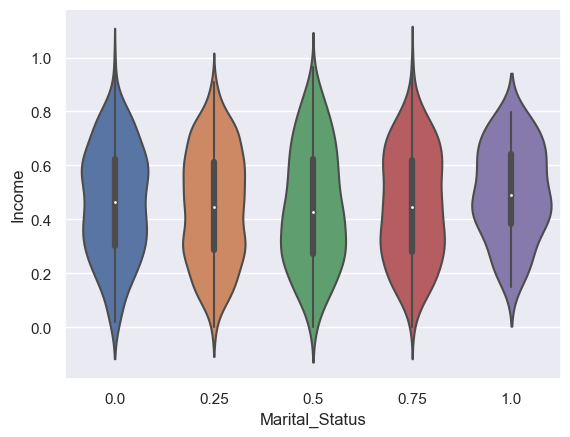

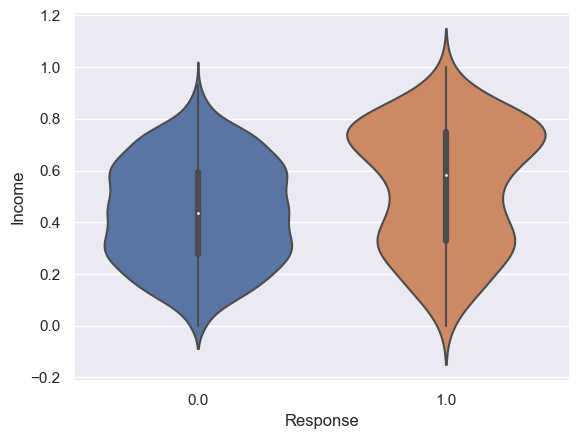

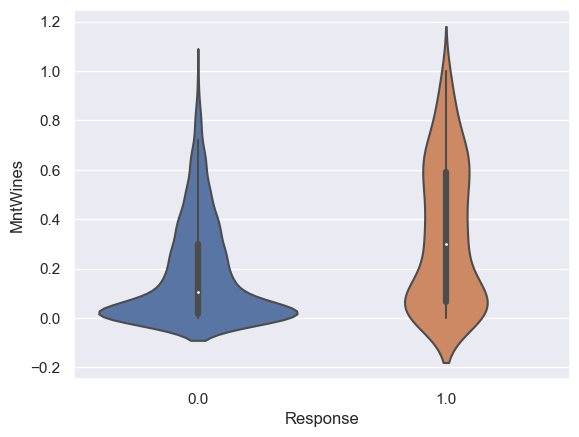

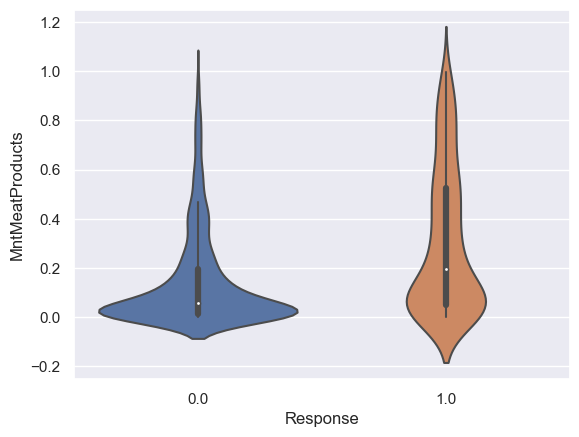

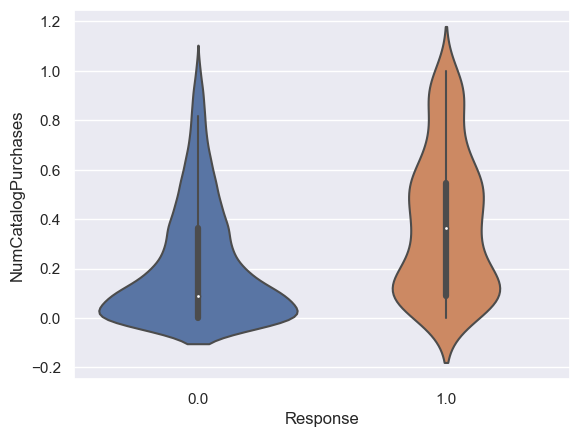

In [76]:
sns.violinplot(x='Marital_Status', y='Income', data=df)
plt.show()
sns.violinplot(x='Response', y='Income', data=df)
plt.show()
sns.violinplot(x='Response', y='MntWines', data=df)
plt.show()
sns.violinplot(x='Response', y='MntMeatProducts', data=df)
plt.show()
sns.violinplot(x='Response', y='NumCatalogPurchases', data=df)
plt.show()


### 10. Factor plots for variout variables with hue = Response. this gives us the insights into how 

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


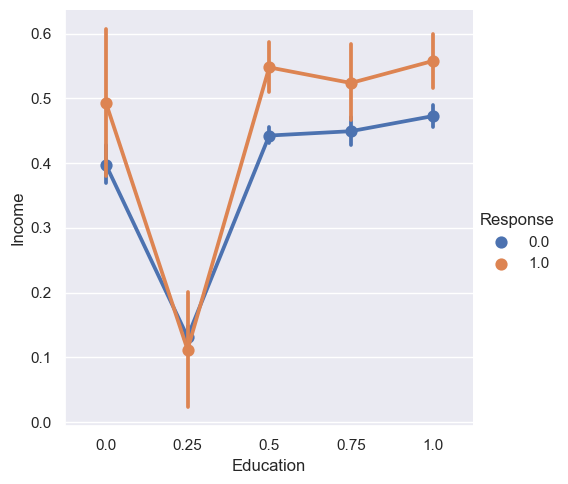

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


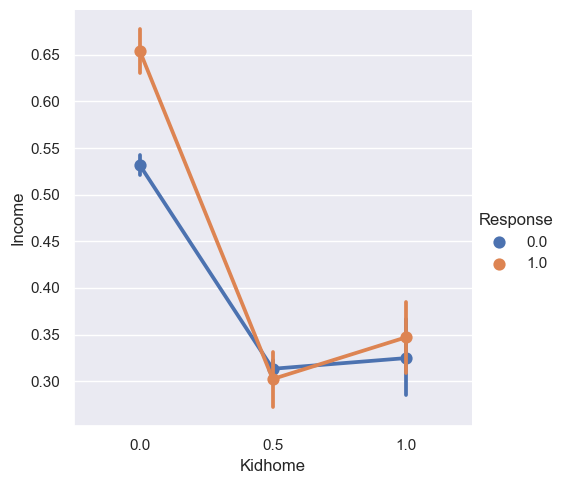

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


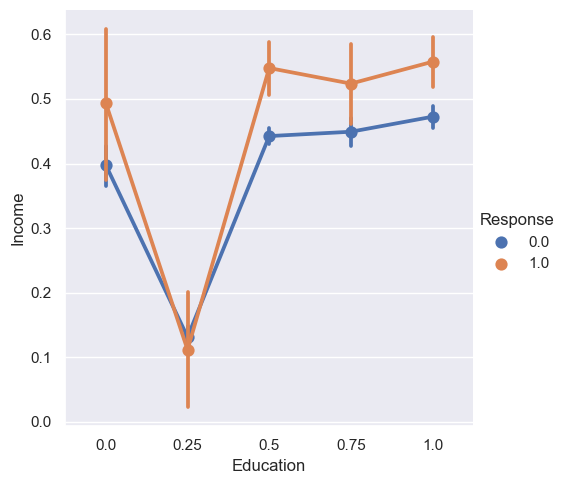

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


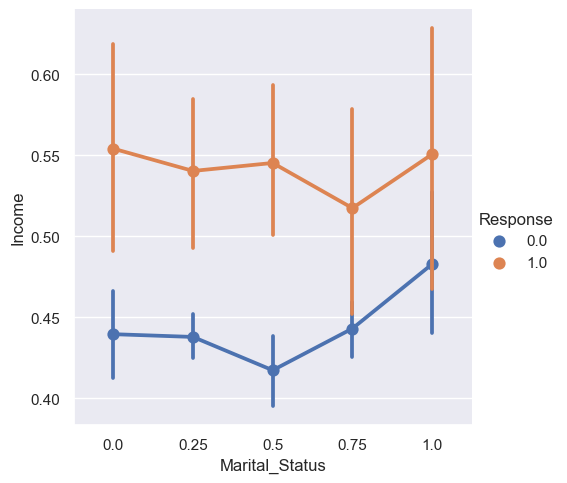

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


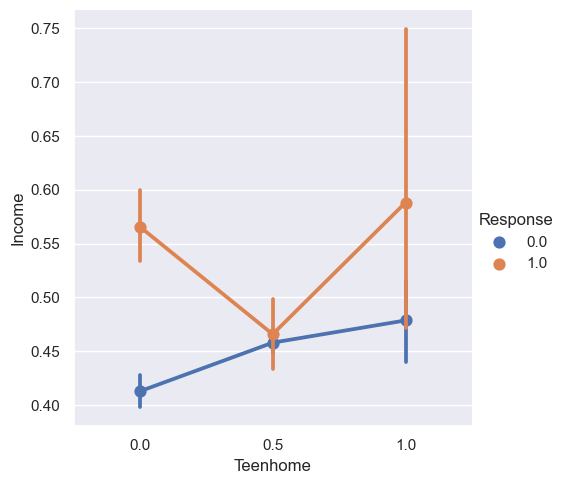

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


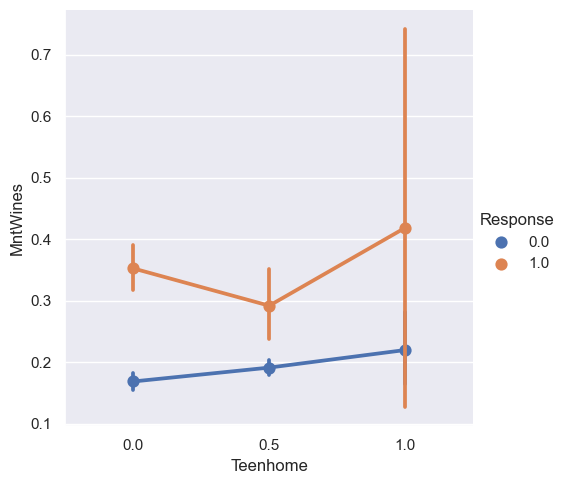

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


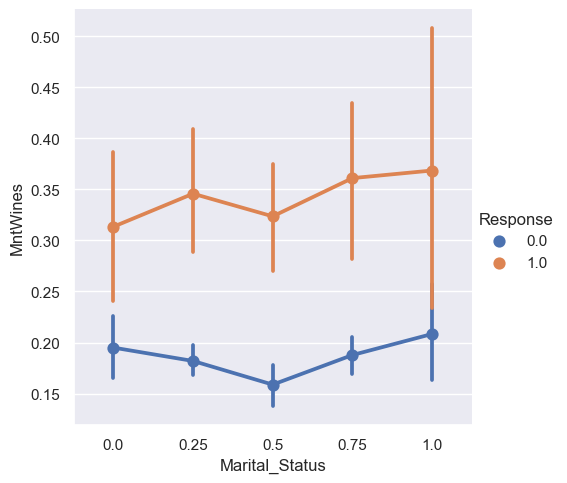

C:\Users\prath\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


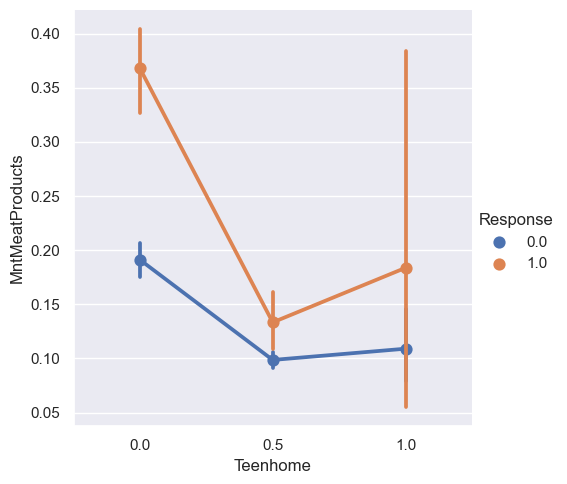

In [73]:
sns.factorplot(x='Education', y='Income', hue='Response', data=df)
plt.show()
sns.factorplot(x='Kidhome', y='Income', hue='Response', data=df)
plt.show()
sns.factorplot(x='Education', y='Income', hue='Response', data=df)
plt.show()
sns.factorplot(x='Marital_Status', y='Income', hue='Response', data=df)
plt.show()
sns.factorplot(x='Teenhome', y='Income', hue='Response', data=df)
plt.show()
sns.factorplot(x='Teenhome', y='MntWines', hue='Response', data=df)
plt.show()
sns.factorplot(x='Marital_Status', y='MntWines', hue='Response', data=df)
plt.show()
sns.factorplot(x='Teenhome', y='MntMeatProducts', hue='Response', data=df)
plt.show()
